In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from Config import df

### a.) Correlaciones

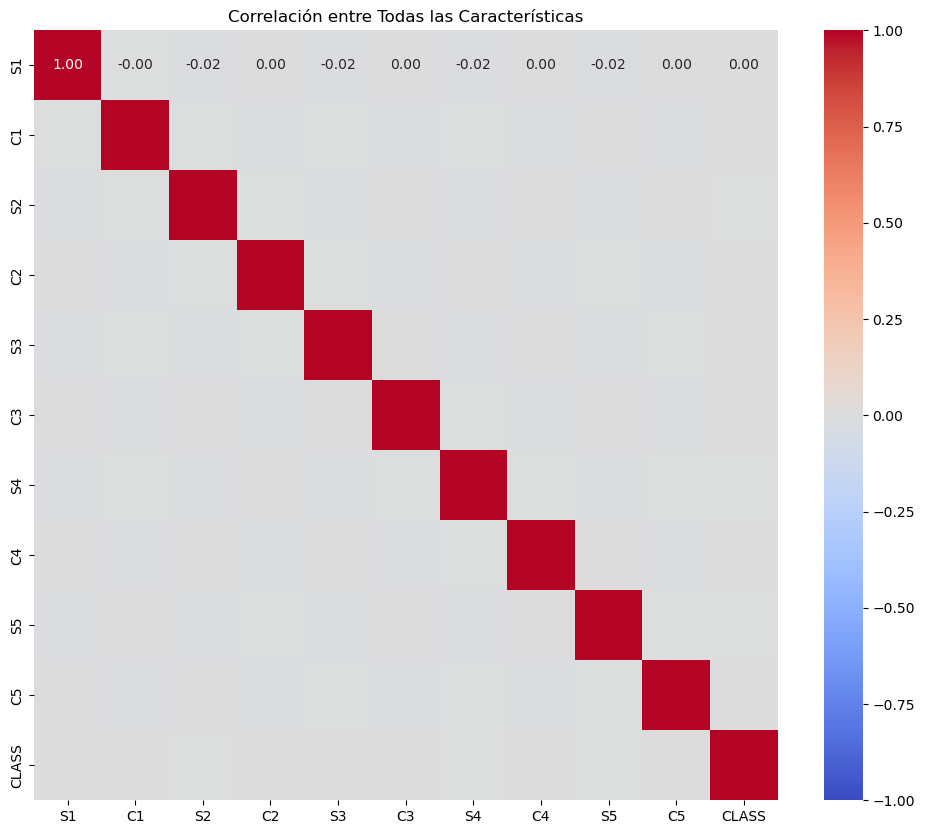

In [2]:
# Calculando la matriz de correlación para todas las características
full_correlation_matrix = df.corr()

# Visualizando la matriz de correlación completa
plt.figure(figsize=(12, 10))
sns.heatmap(full_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlación entre Todas las Características')
plt.show()

### b.) Componentes Principales (PCA)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
# Estandarizar los rangos de las cartas
scaler = StandardScaler()
X = df.iloc[:,:-1].values
X_scaled = scaler.fit_transform(X)

In [5]:
# Aplicar PCA

pca = PCA(n_components=None)
Xpca = pca.fit_transform(X_scaled)
pilambda = pca.explained_variance_ratio_
Xloadings = pca.components_.T * np.sqrt(pilambda)

In [6]:
# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

print('Varianza explicada por cada componente:', explained_variance)
print('Varianza explicada acumulada:', cumulative_explained_variance)

Varianza explicada por cada componente: [0.10255461 0.10221355 0.10207898 0.10205923 0.10189938 0.1018206
 0.10166758 0.10162753 0.0921793  0.09189924]
Varianza explicada acumulada: [0.10255461 0.20476815 0.30684714 0.40890637 0.51080575 0.61262635
 0.71429393 0.81592146 0.90810076 1.        ]


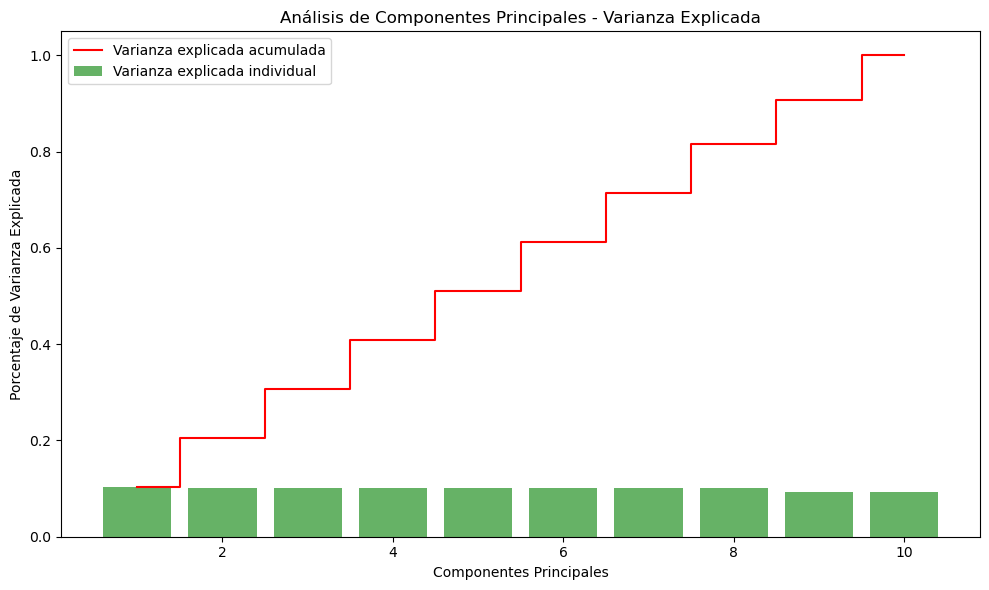

In [7]:
# Graficar la varianza explicada y la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, align='center',
        label='Varianza explicada individual', color='g')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid',
         label='Varianza explicada acumulada', color='r')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.title('Análisis de Componentes Principales - Varianza Explicada')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

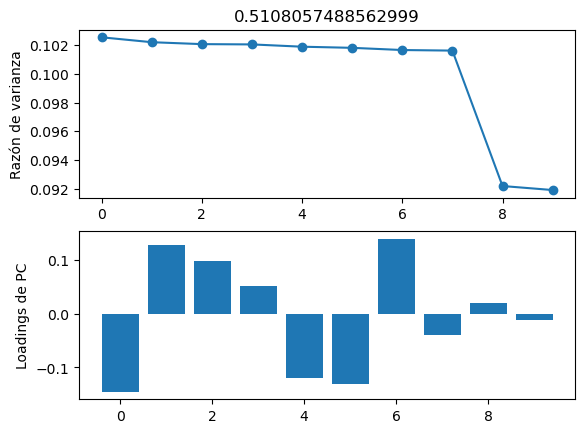

In [8]:
plt.subplot(211)
plt.plot(range(X.shape[1]),pilambda,'o-')
plt.ylabel('Razón de varianza')
plt.title(np.sum(pilambda[0:5]))
plt.subplot(212)
plt.bar(range(X.shape[1]),Xloadings[:,2])
plt.ylabel('Loadings de PC')
plt.show()

### c.) Árboles de desición (Random Forest)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Separando los datos en características y objetivo
X = df.drop('CLASS', axis=1)
y = df['CLASS']

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenando el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Obteniendo la importancia de las características
feature_importances = rf_model.feature_importances_

# Creando un DataFrame para visualizar mejor la importancia de cada característica
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

feature_importances_df


,Feature,Importance
9,C5,0.145896
7,C4,0.144572
5,C3,0.144406
3,C2,0.143595
1,C1,0.143423
6,S4,0.056478
8,S5,0.056272
4,S3,0.055517
2,S2,0.054925
0,S1,0.054917


In [10]:
# feature importance acummulated
feature_importances_df['Importance_acum'] = feature_importances_df['Importance'].cumsum()
feature_importances_df

,Feature,Importance,Importance_acum
9,C5,0.145896,0.145896
7,C4,0.144572,0.290467
5,C3,0.144406,0.434873
3,C2,0.143595,0.578468
1,C1,0.143423,0.721890
6,S4,0.056478,0.778369
8,S5,0.056272,0.834640
4,S3,0.055517,0.890158
2,S2,0.054925,0.945083
0,S1,0.054917,1.000000
